# Multilayer Perceptron Implementation<center>

In [20]:
#Libraries
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## Class Network

In [21]:
class Network:
    """
    Given sizes,the size of each layer, initialise the weigths
    and biases randomly
    """
    def __init__(self,sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]] #for a network with n layer, we have n-1 bias vector
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1],sizes[1:])]
        
    @staticmethod
    def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))
    
    @staticmethod
    def sigmoid_prim(z):
        return Network.sigmoid(z)*(1-Network.sigmoid(z))
    
    def feedforward(self,a):
        """
        Return the output of the network with input "a"
        """
        for b,w in zip(self.biases,self.weights):
            a=Network.sigmoid(np.dot(w,a)+b.flatten())
            
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """
        Train the neural network using mini-batch stochastic 
        gradient descent. The "training_data" is a list of 
        tuples "(x, y)" representing the training inputs and
        the desired outputs. The other non-optional parameters
        are selfexplanatory. If "test_data" is provided then
        the network will be evaluated against the test data
        after each epoch, and partial progress printed out.
        This is useful for tracking progress, but slows things
        down substantially.
        
        Inputs :
            epochs : Number of epochs to use
            eta    : Learning rate
                        
        """
        #Size of trainig_data
        n = len(training_data)
        n_test = len(test_data)
        
        #iterate over epochs
        for j in range(epochs):
            random.shuffle(training_data)
            
            #Create mini batches for the SGD
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
            
            #iterate using the mini-batchs
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,eta)
                
            print("Epoch {0}:{1}/{2}".format(j, self.evaluate(test_data), n_test))
    

    def backprop(self,x,y):
        """
        Return a tuple "(nabla_b, nabla_w)" representing the gradient 
        for the cost function C_x. "nabla_b" and "nabla_w" are 
        layer-by-layer lists of numpy arrays, similar to "self.biases" 
        and "self.weights".
        """

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        #feedforward
        activation = x
        activations = [x]
        zs=[]

        for b,w in zip(self.biases,self.weights):
            z = np.dot(w,activation)+b.flatten()
            zs.append(z)
            activation=self.sigmoid(z)
            activations.append(activation)

        #backward pass
        error = np.multiply((activations[-1]-y),self.sigmoid_prim(zs[-1]))
        nabla_b[-1]=error.reshape((-1,1))
        nabla_w[-1]=np.dot(error.reshape((-1,1)),activations[-2].reshape((1,-1)))

        for l in range(self.num_layers-3,-1,-1):
            error = np.multiply(np.dot(self.weights[l+1].T,error),self.sigmoid_prim(zs[l]))
            nabla_b[l] = error.reshape((-1,1))
            nabla_w[l] = np.dot(error.reshape((-1,1)),activations[l].reshape((1,-1)))
        
        return nabla_b,nabla_w
    
    
    def update_mini_batch(self,mini_batch,eta):
        """
        Update the network’s weights and biases by applying
        gradient descent using backpropagation to a single 
        mini batch. The "mini_batch" is a list of tuples 
        "(x, y)", and "eta" is the learning rate.
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x,y in mini_batch:
            m = len(mini_batch)
            
            delta_nabla_b,delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
        
            
        self.weights = [w-(eta/m)*nw for w,nw in zip(self.weights,nabla_w)]            
        self.biases = [b-(eta/m)*nb for b,nb in zip(self.biases, nabla_b)]
                   
            
    def evaluate(self, test_data):
        """
        Return the number of test inputs for which the neural
        network outputs the correct result. Note that the 
        neural network’s output is assumed to be the index of 
        whichever neuron in the final layer has the highest 
        activation.
        """
        test_results = [(np.argmax(self.feedforward(x)), y) for x, y in test_data] 
        return sum(int(x == y) for (x, y) in test_results)
            
                
            

# Test on MNIST data Set

In [22]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display some information about the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Optionally, you can normalize the pixel values to be in the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [25]:
#Fllaten the data set
def vectorise_y(y):
    e=np.zeros(10)
    e[y]=1
    return e

training_data = [(x_train[i].flatten(),vectorise_y(y_train[i])) for i in range(60000)]
test_data = [(x_test[i].flatten(),y_test[i]) for i in range(10000)]

In [26]:
#Create a network
net = Network([784,128,128,10])

In [29]:
net.SGD(training_data,10,32,1,test_data)

Epoch 0:8217/10000
Epoch 1:8956/10000
Epoch 2:9135/10000
Epoch 3:9183/10000
Epoch 4:9252/10000
Epoch 5:9272/10000
Epoch 6:9322/10000
Epoch 7:9354/10000
Epoch 8:9353/10000
Epoch 9:9385/10000


## Using our network

In [38]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np
from PIL import Image
from io import BytesIO

# Create a file and upload a 28*28 pixel image
upload = widgets.FileUpload(accept=".png", multiple=False)


# Display the upload widget
display(upload)

FileUpload(value=(), accept='.png', description='Upload')

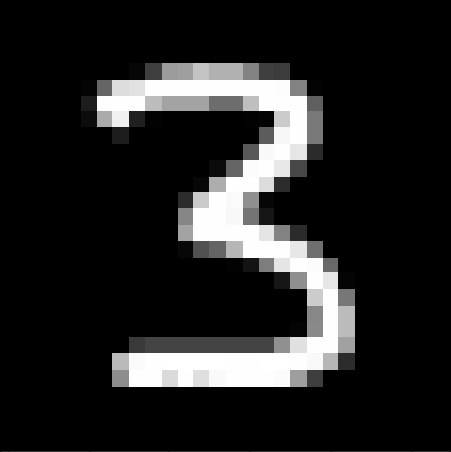

In [47]:
# Get the uploaded file content
content = upload.value[0]['content']

# Con!vert the content to a NumPy array
image = Image.open(BytesIO(content))

 # Convert the image to grayscale
image_gray = image.convert('L')

resized_image = image_gray.resize((28, 28))

image_array = np.array(resized_image)
display(image)

In [48]:
np.argmax(net.feedforward(image_array.flatten()))

C:\Users\pc\AppData\Local\Temp\ipykernel_13384\1914740413.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


3